# Decision Trees Classification

**Decision Trees**
- Highly interpretable, even more than KNN and Regression models
- Sequences of diferent quesitons
- Used for **Classification** and **Regression** problem statements

Decision Tree Definitions
- Decision Trees are Machine Learning algorithms that progressively divide data sets into smaller data groups based on descriptive feature, until they reach sets that are small enough to be described by some label
- Decision Trees apply a top-down approach to data, trying to group and label observations that are similar
- When the target variable consits of real numbers we use **Regression Trees**
- When the targes variable is categorical we use **Classification Trees**
- Terminology
    - Root node: Beginning of a tree
    - Spliiting: Splitting the tree
    - Branch: the branch that goes to the Decision node
    - Leaf node (Terminal node)
    - Sub-Tree
    - Depth-level (longest path from the Root node to the Leaf node)
    - Prunning (removing sub notes from a tree)
    
 **We can check the impurity of our Decision Tree with:**
- Regression Trees
    - MSE (Mean Squared Error)
- Classification Trees
    - Error Rate: probability of making a mistake
       - (perferably not used in practice as it is sensitive to overfitting the data)
    - Entropy: Measures the impurity of randowmness (uncertainty) in the data points
    - Gini Index: Measures how often a randomly chosen element would be incorrectly labeled
    
    
    
 Different decision tree algorithms utilize different impurity metrics
 
 **How does the algorithm select X(feature) and s (split)?**
 - Using Recursive Binary Splitting: This is a numerical procedure where all the values are linked up and different split points are tried and tested using a cost function. The split wiht the lowest cost is selected
 - Split that leads to the largest possible reduction in RSS (Residual Sum of Squares)
 - Calculatin with different lines where the MSE is the smallest
 - The algortihm repeates the process, looking for the best feature and best split in order to split the data further to minimize the RSS within each of the resulting regions
 - The process continues until a stopping criterion is reached; for instance, continues until no regeion contains more than a fixed number of observation
 
**Classification Trees**
- Classification trees are very ssimilar to regression trees, except that it is being used to predict a qualitative response rather than a quantitative one
- The prediction of the algorithm at each terminal node will be the category with the majority of datapoints i.e., the most commonly occuring class
- Just as in the regression, the recursive binary splitting is used to grow a classification tree. However, instead of RSS we will be using one of the following impurity criteria:
    - Classification error rate: Not sufficiently sensitive to node purity (changes in the node probabilities) and in practice either Gini or Cross Entropy is prefered 
    - Gini index: What features to start with and where to do the split
    - Cross entropy
    
**Pruning a tree*
- Decision Tree may produce good predcitions on the training set, but is likely to overfit the data leading to poor test performance (this is the result when no hyperparameter tuning is done as the Decision tree will make every possible split for every variable in the train set. Then applying this model on the test set will result in high Bias.
- Smaller tree with fewer splits may lead to lower variance and better interpretation at the cost of a litle bit of bias (This strategy may result in smaller trees, but is too short-sighted)
    - A seemingly worhtles split early on in the tree might be followed by a very goot spliy, a split that leads to a large reduction in RSS/impurity index later on
- Making all the decisions in the trees and then pruning back to the good trees
- A better strategy is to grow a very large tree, and then prune it back in order to obtain a subtree
- Cost complexity pruning is used to do this (penalizing by restricting adding more complexity to the model)

**Cost complexity pruning also called as weakest link pruning**
- Consider a sequence of trees indexed by a nonnegative tuning meter alpha(lambda)
- For each value of alpha corresponds a subtree such that the following objective functions is minimized
- Can find best alpha with cross validation (CV)
- Alpha control the bias variance trade off and is determined by cross validation (CV)

**Building a Regression Tree**
1. Use recursive binary splitting to grow a large tree (this is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function. The split with the lowest cost is selected)
2. Apply cost complexity to pruning to the large tree in order to obtain a sequence of best subtrees, as a function of alpha (lambda)
3. Use K-fold cross-validation (CV) to choose the best alpha (lambda). That is divide the training observations into K fold. For each k=1,..K: \
    a. Repeat steps 1 and 2 on all but the k fold of the training data\
    b. Evaluate the mean squared (MSE) prediction error on the data in the left out k fold, as a function of alpha. Average the results for each value of alpha, and pick alpha minimize the average error.\
4. Return the subtree from step 2 that corresponds to the chosen value of alpha


**Avoiding Overfitting**
To avoid overfitting, regularization parameters can be added to the model such as:
- Maximum depth of the tree: Maximum splits of a tree
- Minimum population at a node: Number of observations in the node (the minimum populationa node should consist of). if you don't use a number of observation your model will overfit
- Maximan number of decision nodes (amount of nodes you want to have)
- Minimum impurity decrease: info gain
- Alpha: Complexity parameter

Other **hyperparameters are**:
- Criterion
    - Gini
    - Entropy
- Splitter
    - Best
    - Random
- Class weight
 - Balanced
 - None 
 
 Imbalanced data typically refers to a classification problem where the number of observations per class is not equally distributed; often you will have a large amount of data/oberservations for one class(referd as the majority class which is overrepresented) and the smalles as the minority class
 
 **Decision Trees Pros and Cons**
- Pros
    - Easy to interpret and visualize
    - Can easily handle categorical data without the need to create dummy variables
    - Can easily capture Non-linear patters
    - Can handle data in its raw form (no preprocessing and Scaling needed as it does not use euclidience distance)
    - Has no assumptions about the distribution because of the non-parametric nature of the algorithm
- Cons
    - Poor level of predictive accuracy (This can be reduced by bagging and boosting algorithms)
    - Sensitive to noisy data. It can overfit noisy data. Small variations in data can result in different decision trees
       
**Overfitting, Underfitting and Fitting**

    - Overfitting = Bias low, Variance high
    - Underfiting = Bias high, Variance High
    - Fitting = Bias low, Variance low

In [99]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [100]:
# we use this rand_state = 1000 to keep getting the same data 
rand_state= 1000

#### Read in the data

In [101]:
# read in data
df = pd.read_csv("Social_Network_Ads.csv")

In [102]:
# Print first 5 rows of the dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [103]:
# Check for null values and what type our columns are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [104]:
# First we look at target variable porportions
pd.crosstab(df['Purchased'], df['Purchased'], normalize='all')*100

Purchased,0,1
Purchased,,
0,64.25,0.00
1,0.00,35.75


From the graph below we can see that
- 64.25% not prucashed
- 35.75% purchased

# Data preprocessing

In [105]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [106]:
# drop not used columns
df.drop('User ID', axis=1, inplace=True)

# Dealing with categorical variables:

In Decision Trees models, we don't need to transfer the categorical variable into dummy variables. However, the algorithm cannot handle string names either. So we should number code the categorical variables

In [107]:
df['Gender']=np.where(df['Gender']=='Male',1,0)

In [108]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [109]:
# Rearange column order
df = df[['Purchased', 'Age', 'EstimatedSalary', 'Gender']]

In [110]:
df.head()

,Purchased,Age,EstimatedSalary,Gender
0,0,19,19000,1
1,0,35,20000,1
2,0,26,43000,0
3,0,27,57000,0
4,0,19,76000,1


# Data visualization

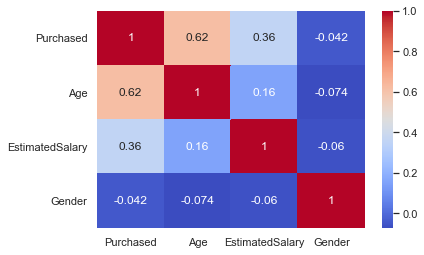

In [111]:
# useing heatmap to see the correlation between our features
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

Taken our dependent feature Purchased we can see that independent feature Age is highly correlated

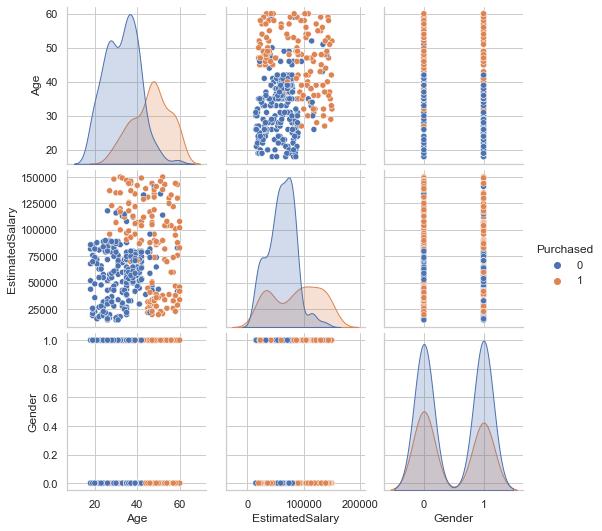

In [112]:
sns.set_style('whitegrid')
sns.pairplot(df,hue='Purchased')
plt.show()

# Defining the variables and splitting the data

In [113]:
y = df['Purchased'] # dependent features
X = df.drop('Purchased', axis=1) # independent features

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# Scaling the features

For tree based models, there is no need to scale the features (No distance metrics is used)

# Decision Tree Classification with SKlearn

In [114]:
# Import Machine Learning Model DecissionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
# Set the DecisionTreeClassifier in a class
Tree_classifier = DecisionTreeClassifier()

# Fitting our train data
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [117]:
# Predicting the Test set classes
y_hat = Tree_classifier.predict(X_test) #y_hat are our predictions

## Performance metrics:

**What is a Confusion Matrix?**

A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.


In [118]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [91]:
print(confusion_matrix(y_test, y_hat))

[[44  4]
 [13 19]]


In [119]:
y_test.shape

(80,)

When we sum the numbers in the confusion matrix we will get 80 which is teh same as our test size.

**What Does The Confusion Matrix says?**
- 44 did purchased were classified correctly
- 19 did not purchased were classified correctly
- 13 did purchased were classified incorrectly
- 4 did not purchased were classief incorrectly

#### Built-in classification report

In [121]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        48
           1       0.75      0.56      0.64        32

    accuracy                           0.75        80
   macro avg       0.75      0.72      0.73        80
weighted avg       0.75      0.75      0.74        80



## Pruning the tree using cost complexity pruning method. 
### Choosing $\alpha$ with cross validation. 

In [122]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)

In [123]:
path

{'ccp_alphas': array([0.        , 0.0015625 , 0.0020202 , 0.00203488, 0.00243056,
        0.0025    , 0.0025    , 0.00265625, 0.00273437, 0.00277778,
        0.00284091, 0.003125  , 0.00318723, 0.00357143, 0.00381731,
        0.00511297, 0.00775811, 0.008125  , 0.12078047, 0.18094607]),
 'impurities': array([0.003125  , 0.0046875 , 0.01074811, 0.01685276, 0.02657498,
        0.03157498, 0.03907498, 0.04438748, 0.04985623, 0.05541179,
        0.0610936 , 0.0673436 , 0.08327975, 0.09399404, 0.10162865,
        0.11185459, 0.13512893, 0.15137893, 0.27215939, 0.45310547])}

In [124]:
ccp_alphas = path.ccp_alphas

In [125]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [128]:
# Putting all our alphas with respective accuracies in a dataframe
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head(30)

,alpha,accuracy_CV
0,0.000000,0.878125
1,0.001562,0.871875
2,0.002020,0.871875
3,0.002035,0.859375
4,0.002431,0.875000
5,0.002500,0.878125
6,0.002500,0.862500
7,0.002656,0.871875
8,0.002734,0.871875
9,0.002778,0.875000


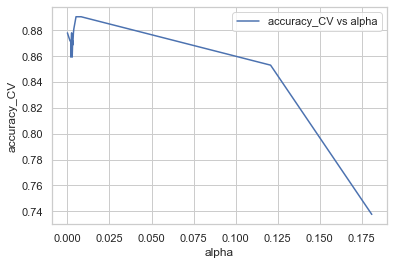

In [129]:
# Plotting the Accuracy vs Alpha
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

Fromt he graph above we can conclude as the alpha increases the accuracy decreases

In [131]:
# Shows which row in the dataframe has the highest accuracy 
np.argmax(output['accuracy_CV'])

15

In [132]:
# Shows the highest accuracy in the dataframe
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.005113
accuracy_CV    0.890625
Name: 15, dtype: float64

**The maximum accuracy is 88%**

In [133]:
# Gets the optimal alpha from the dataframe and stores it in a variable called optimal_alpha
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.005112967633459416

**Refit the Decision Tree classifier with optimal alpha**

In [134]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

#### Confusion matrix

In [135]:
print(confusion_matrix(y_test, y_hat_opt))

[[45  3]
 [ 8 24]]


**What Does The Confusion Matrix says?**
- 45 did purchased were classified correctly
- 24 did not purchased were classified correctly
- 8 did purchased were classified incorrectly
- 3 did not purchased were classief incorrectly

Compared with the previous confusion matrix without the optimal alpha we caan see that the predictions have increased and the model got better


#### Built-in classification report

In [136]:
print(classification_report(y_test, y_hat_opt))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.89      0.75      0.81        32

    accuracy                           0.86        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80



###  Cross validation

Now let's try to get an estimate for the accuracy of our model using cross validation technique. 

In [137]:
from sklearn.model_selection import cross_val_score

In [147]:
# remember we saved our model in an object called "Tree_classifier"
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [149]:
# we have given as input cv = 5 therefore 5 accuracies are displayed. If we increase the CV=10 then 10 accuracies will be displayed
accuracy

array([0.90625 , 0.890625, 0.875   , 0.921875, 0.859375])

In [150]:
# calcualtes the accuracy 
round(accuracy.mean(),3)

0.891

## Visualizing the Tree
4 different ways of visualizing a tree in Python: https://mljar.com/blog/visualize-decision-tree/

Plot DT with **plot_tree** method from sklearn. 

Let's visualize one simple tree with two features only. 


In [151]:
df.columns

Index(['Purchased', 'Age', 'EstimatedSalary', 'Gender'], dtype='object')

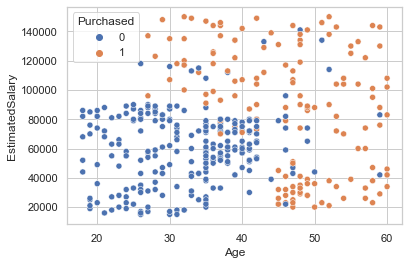

In [152]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')
plt.show()

Fromt he scerplot above we can see that when the age is 40 and salary is around 90K they can be grouped in did not Purchased and above that Did Purchase

In [160]:
dtree= DecisionTreeClassifier(max_depth=2, ccp_alpha=0) #min_samples_leaf=0
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

In [161]:
from sklearn import tree

In [162]:
# Checks shape of the dataframe
X_train.shape

(320, 3)

In [164]:
# First 5 rows of the dataframe
X_train.head()

,Age,EstimatedSalary,Gender
269,40,61000,1
389,48,35000,0
232,40,107000,1
89,35,50000,1
236,40,57000,1


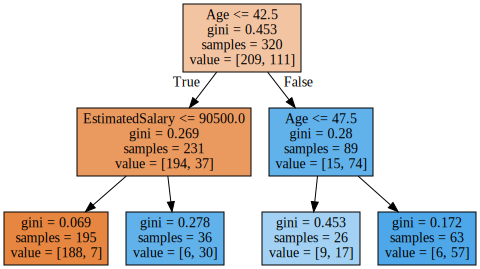

In [165]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [69]:
fig.savefig("DT_plot_classification.png")

**Exercise**: 

    1. What is the level?
    - It is 2 as our max_depth = 2
    
    2. What is |T| (terminal node)?
    - it is 4
    
    3. How do you make sure that each terminal node has at least 50 observations?
    - By adding paramter min_samples_leaf = 50

## Advance Visualization (this part is optional)

Visualising the Training set results (in 2D of course!). We have to rerun the whole model with 2 explanatory variables

In [166]:
X= df[['Age', 'EstimatedSalary']]
y= df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [168]:
# Feature Scaling: only for visualization purposes we need to scale the features. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Fitting Decision Tree classifier to the Training set

In [169]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train.values.reshape(-1,))
y_hat_vis = dtree.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


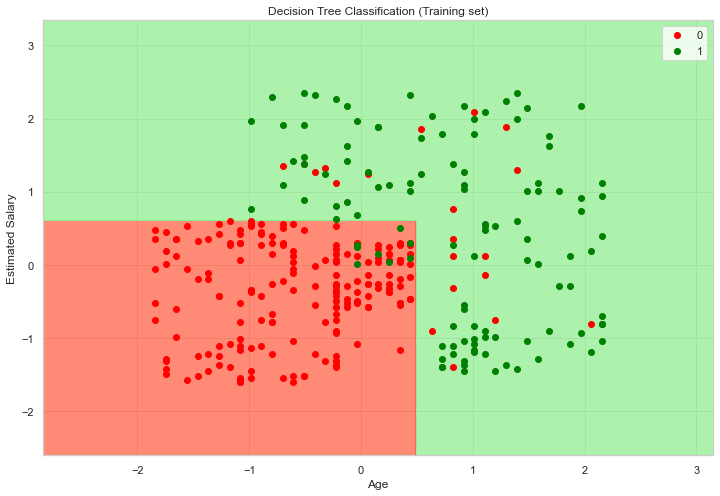

In [170]:
# visualization
plt.figure(figsize=(12,8))

X_set, y_set = X_train, y_train.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


from matplotlib.colors import ListedColormap
plt.contourf( X1, X2 , dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Exercise**

If you use max_depth=100, what is the accuracy in the training set?\
- The accuracy in the train set will increase because you are overfitting however in the test set you will underfit 

# Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


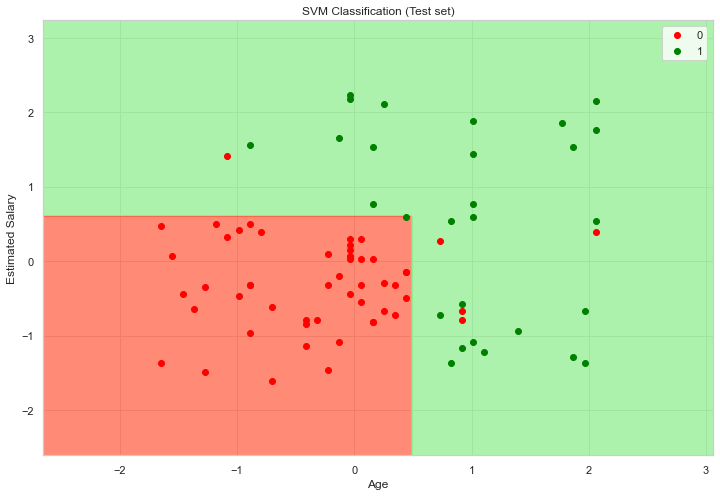

In [171]:
plt.figure(figsize=(12,8))

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test.iloc[:,0].values
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, dtree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#FF6347', '#90EE90')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [97]:
print(confusion_matrix(y_test, y_hat_vis))

[[47  5]
 [ 1 27]]
